In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
df = pd.read_csv("C:/Users/admin/OneDrive/Desktop/DATASET/world-happiness-report-2021.csv")
df1=pd.read_csv("C:/Users/admin/OneDrive/Desktop/DATASET/world-happiness-report.csv")
import warnings
warnings.filterwarnings("ignore")

# Read and Analyse Data

In [3]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268



1. df - consist of 2021 happiness index and corresponding data
2. df1 - consist of past records by country

# Import plotting libraries

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

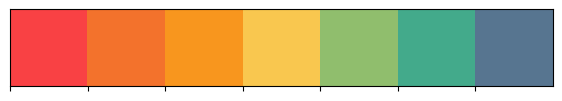

In [6]:
#Colors to be used in the plots
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

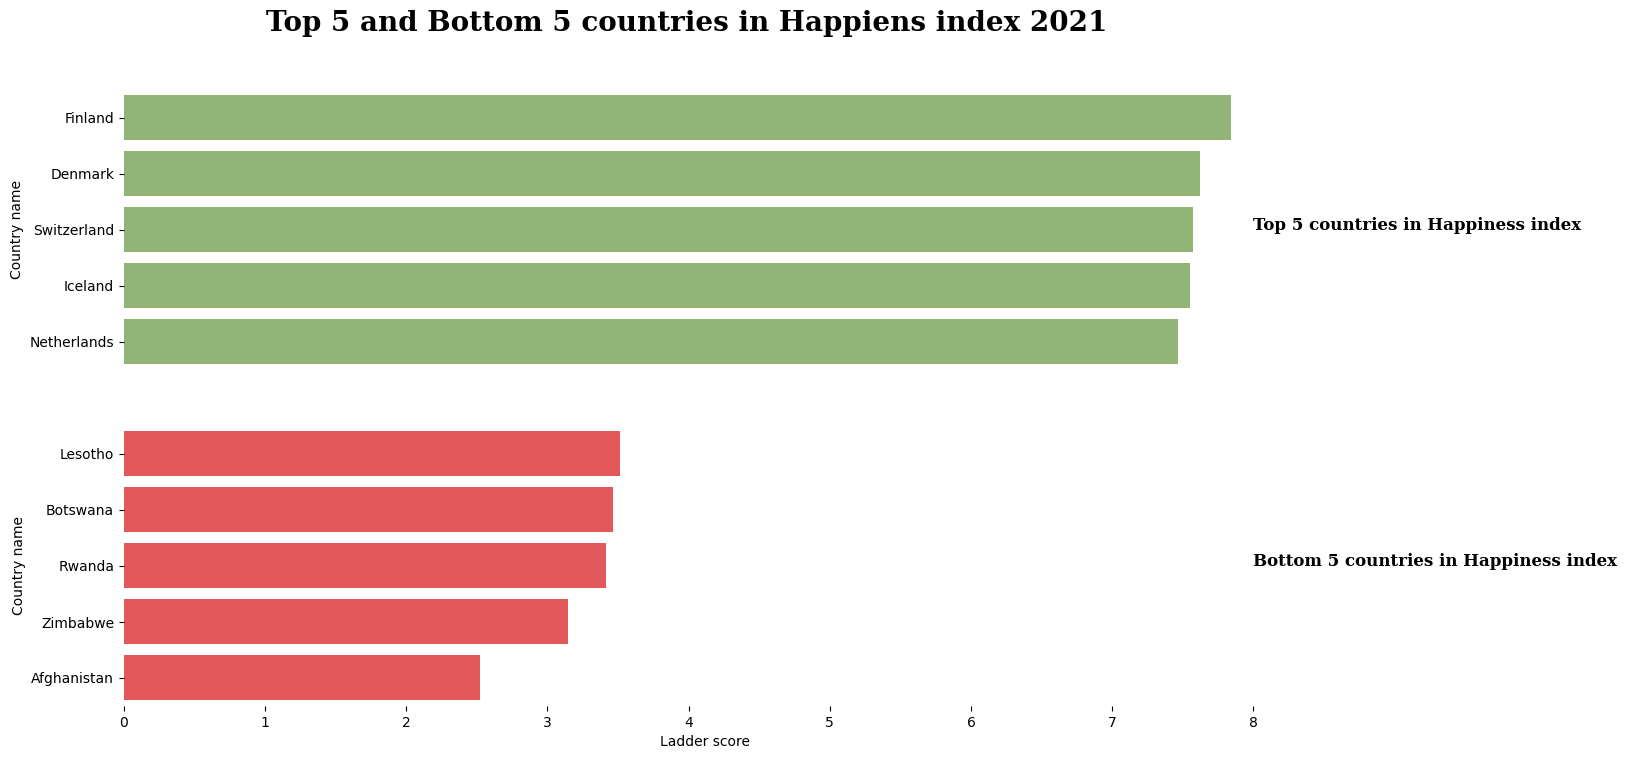

In [7]:
#top 5 and bottom 5 countries in 2021 report
fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries in Happiens index 2021", family='Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_5=df.head(5)
bot_5= df.tail(5)
ax1=sns.barplot(data=top_5, x=top_5['Ladder score'],y=top_5['Country name'], color=color[4])
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index",xy=(8,2), family='Serif', weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['Ladder score'],y=bot_5['Country name'], color=color[0])
ax2.annotate("Bottom 5 countries in Happiness index",xy=(8,2), family='Serif', weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

Text(9, -0.05, 'There are difference in mean between the Asian countries and EU & American countries')

findfont: Font family 'San' not found.
findfont: Font family 'San' not found.
findfont: Font family 'San' not found.
findfont: Font family 'San' not found.
findfont: Font family 'San' not found.
findfont: Font family 'San' not found.


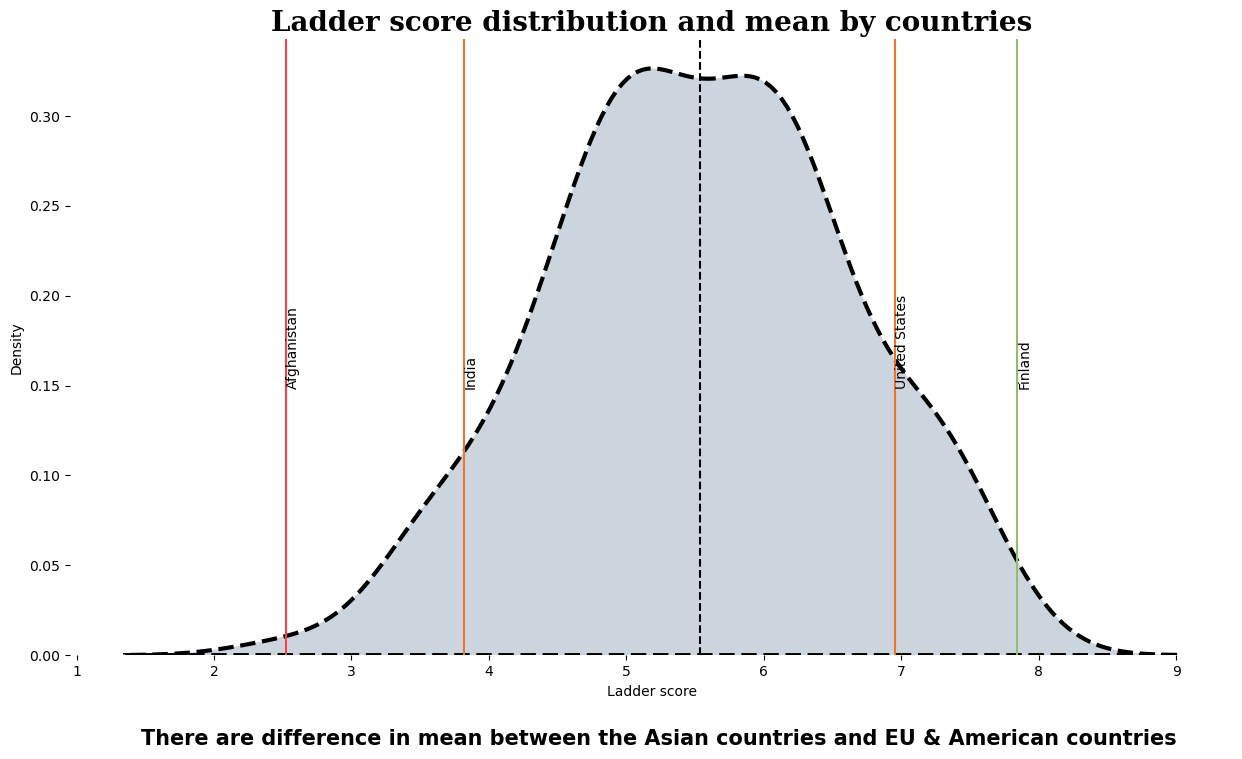

In [8]:
fig=plt.figure(figsize=(15,8))
plt.title("Ladder score distribution and mean by countries",family='Serif', weight='bold', size=20)
sns.kdeplot(df['Ladder score'], fill=True,color=color[-1], shade=True, edgecolor='black', linewidth=3, ls='--', alpha=0.3)
plt.axvline(df['Ladder score'].mean(), c='black',ls='--')
plt.axvline(df[df['Country name']=='Finland']['Ladder score'].mean(), c=color[4])
plt.text(x=df[df['Country name']=='Finland']['Ladder score'].mean(), y=0.15, s='Finland', rotation=90)
plt.axvline(df[df['Country name']=='Afghanistan']['Ladder score'].mean(), c=color[0])
plt.text(x=df[df['Country name']=='Afghanistan']['Ladder score'].mean(), y=0.15, s='Afghanistan', rotation=90)
plt.axvline(df[df['Country name']=='India']['Ladder score'].mean(), c=color[1])
plt.text(x=df[df['Country name']=='India']['Ladder score'].mean(), y=0.15, s='India', rotation=90)
plt.axvline(df[df['Country name']=='United States']['Ladder score'].mean(), c=color[1])
plt.text(x=df[df['Country name']=='United States']['Ladder score'].mean(), y=0.15, s='United States', rotation=90)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)
plt.text(x=9,y=-0.05, s="There are difference in mean between the Asian countries and EU & American countries", ha='right', family='San', size=15, weight='bold')

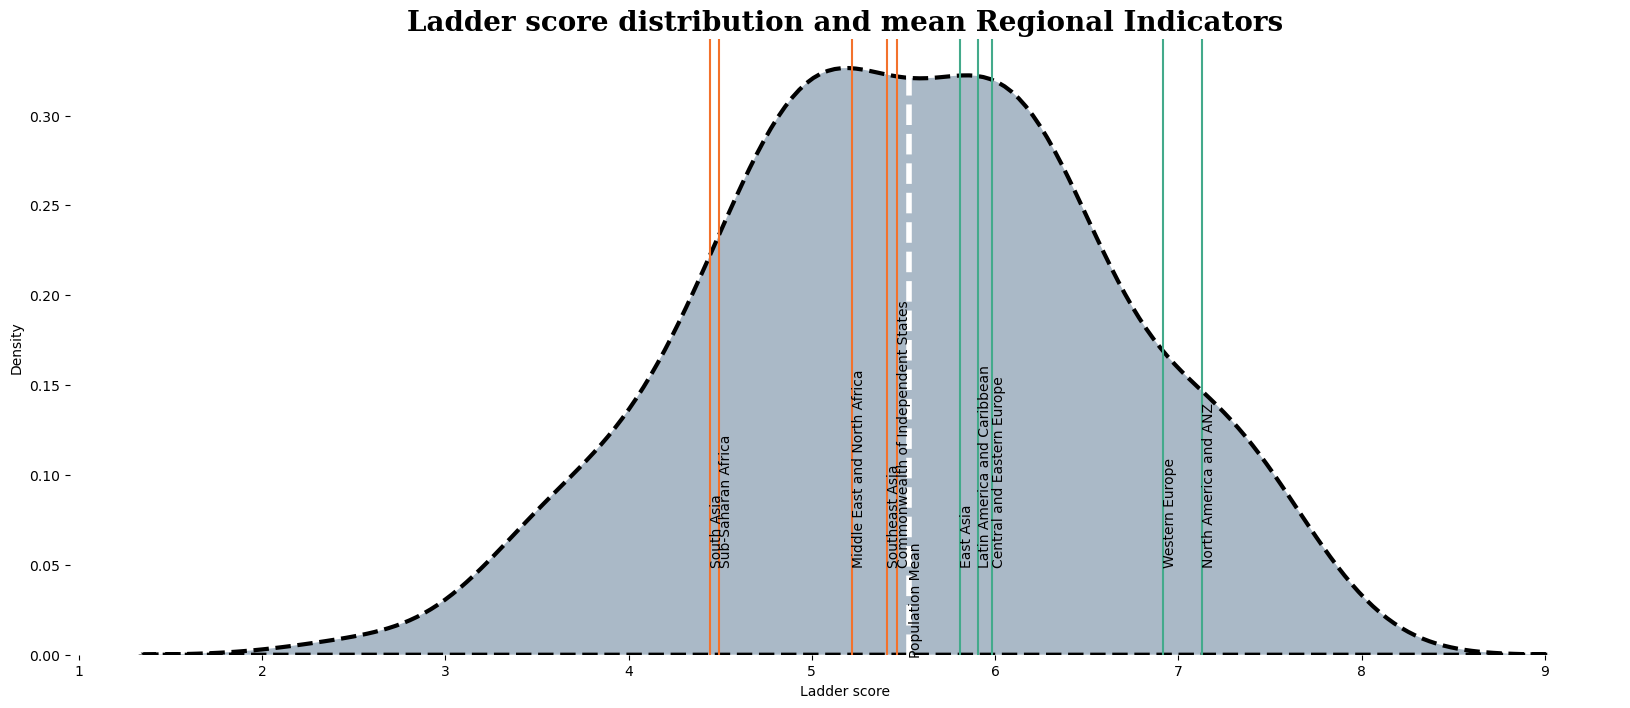

In [9]:
fig=plt.figure(figsize=(20,8))
plt.title("Ladder score distribution and mean Regional Indicators",family='Serif', weight='bold', size=20)
sns.kdeplot(df['Ladder score'], fill=True, shade=True, color=color[-1], linewidth=3, ls='--', edgecolor='black', alpha=0.5)
plt.axvline(x=df['Ladder score'].mean(), linewidth=4, ls='--', color='white')
pop=x=df['Ladder score'].mean()

plt.text(x=df['Ladder score'].mean(),y=0, s='Population Mean', rotation=90)
for i in df['Regional indicator'].unique():
    m=df[df['Regional indicator']==i]['Ladder score'].mean()
    
    if m<pop:
        c=color[1]
    else:
        c=color[5]
    plt.axvline(x=m, color=c)
    plt.text(x=m, y=0.05, rotation=90,s=i)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)
   
    

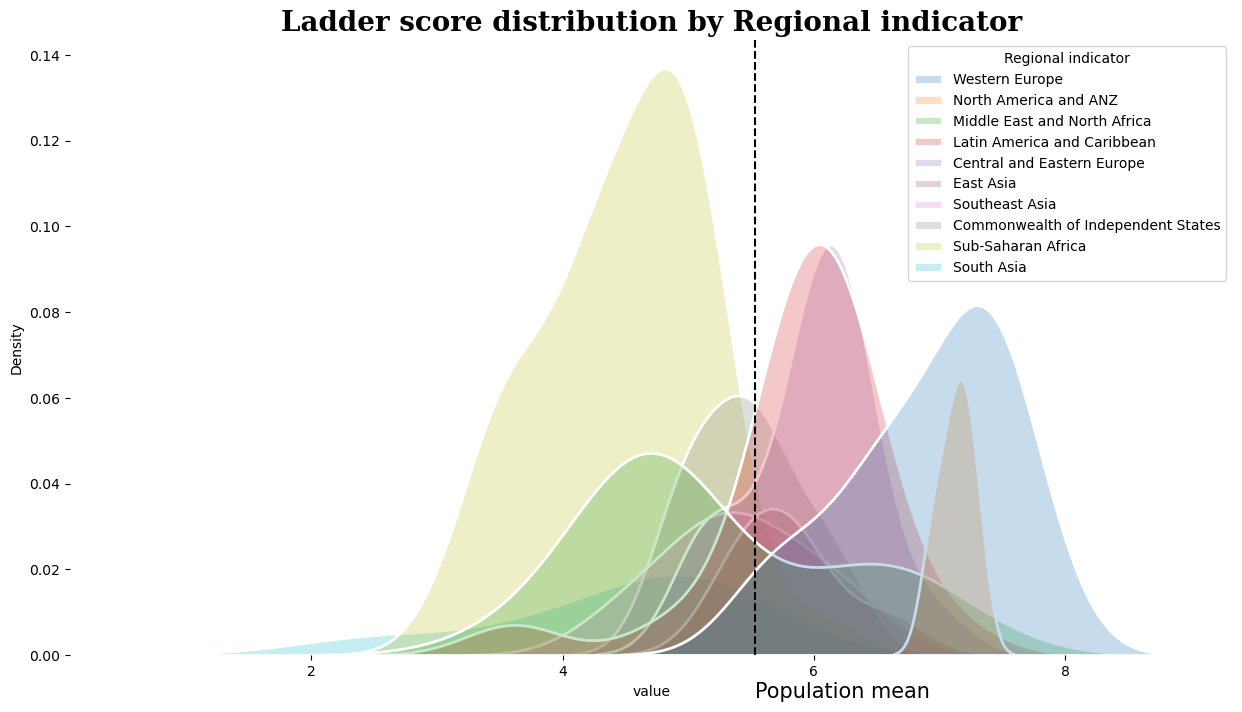

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
melted_df = pd.melt(df, id_vars=['Regional indicator'], value_vars=['Ladder score'])

fig = plt.figure(figsize=(15, 8))
plt.title("Ladder score distribution by Regional indicator", family='Serif', weight='bold', size=20)
sns.kdeplot(data=melted_df, x='value', hue='Regional indicator', fill=True, shade=True, linewidth=2, edgecolor='white', multiple='layer')
plt.axvline(df['Ladder score'].mean(), c='black', ls='--')
plt.text(x=df['Ladder score'].mean(), y=-0.01, s='Population mean', size=15)

# Hide spines
for s in ['left', 'right', 'top', 'bottom']:
    plt.gca().spines[s].set_visible(False)

plt.show()



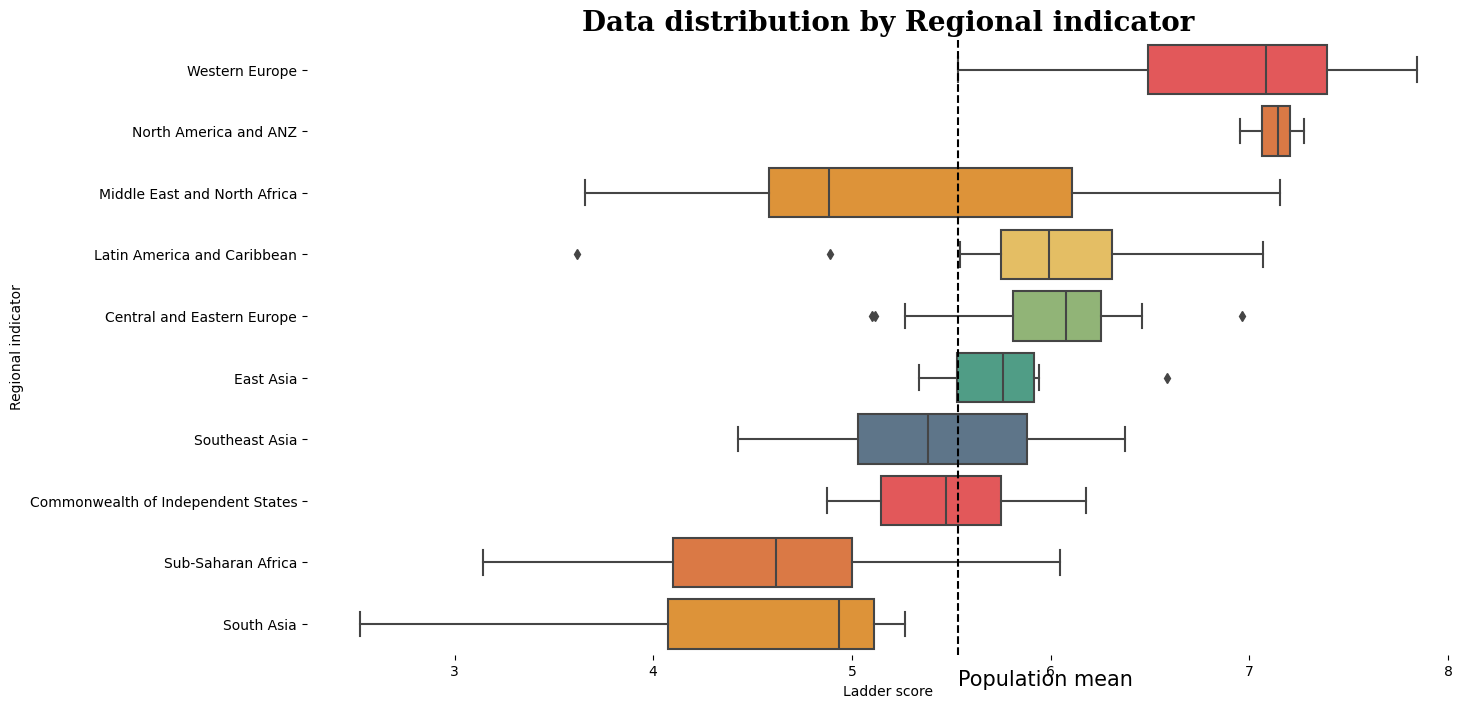

In [11]:
fig=plt.figure(figsize=(15,8))
plt.title("Data distribution by Regional indicator",family='Serif', weight='bold', size=20)
sns.boxplot(x=df['Ladder score'],y=df['Regional indicator'], palette=color)
plt.axvline(df['Ladder score'].mean(), c='black',ls='--')
plt.text(x=df['Ladder score'].mean(),y=10,s='Population mean', size=15)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)


# Hypothesis testing for Regions
# is there a significant difference in between Two Regions

# hypothesis test

# Ho = There is no significant differenct
# H1 = There are signifcant difference

In [12]:
from scipy.stats import ttest_ind, wilcoxon, ttest_rel
def hypo_test(reg1,reg2):
    r1 = df[df['Regional indicator']==reg1]['Ladder score']
    r2 = df[df['Regional indicator']==reg2]['Ladder score']
    t1="Hypotheis test between regions: {} vs {}".format(reg1,reg2)
    stats, p_value= ttest_ind(r1, r2)
    
    if p_value <0.05:
        t2="since p_value : {} is < 0.05, we can reject the Null Hypothesis and say there are significant difference".format(np.round(p_value,3))
    else:
        t2="P_value: {} is >0.05, we can't reject the Null Hypothesis, so we say there is no difference".format(np.round(p_value,3))
    fig=plt.figure(figsize=(15,3))
    plt.title(t1,family='Serif', weight='bold', size=20)
    plt.text(x=plt.xlim()[1]/2,y=plt.ylim()[1]/2,s=t2,ha='center', family='Serif', weight='bold', size=15)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    return

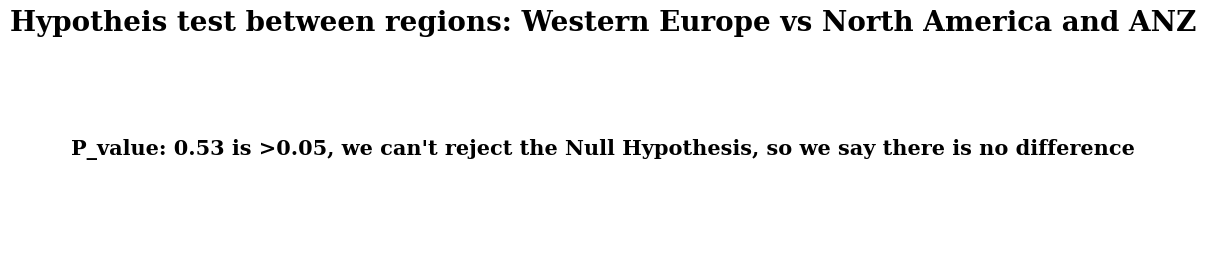

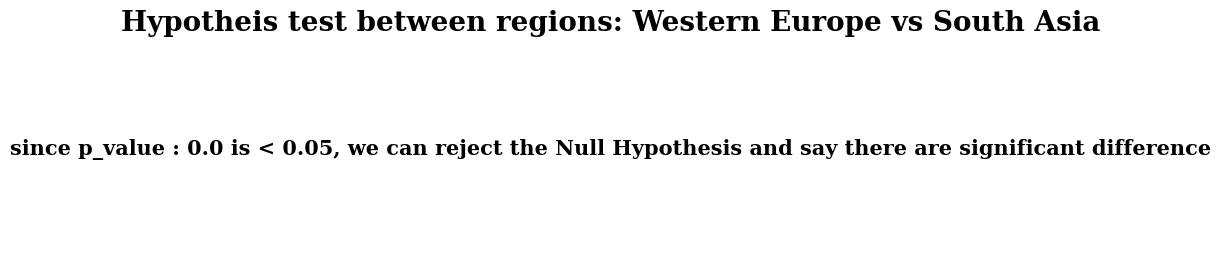

In [13]:
reg=df['Regional indicator'].unique()
hypo_test(reg[0],reg[1])
hypo_test(reg[0],reg[-1])

<Axes: title={'center': 'Life Ladder of top 5 countries and India'}, xlabel='year', ylabel='Life Ladder'>

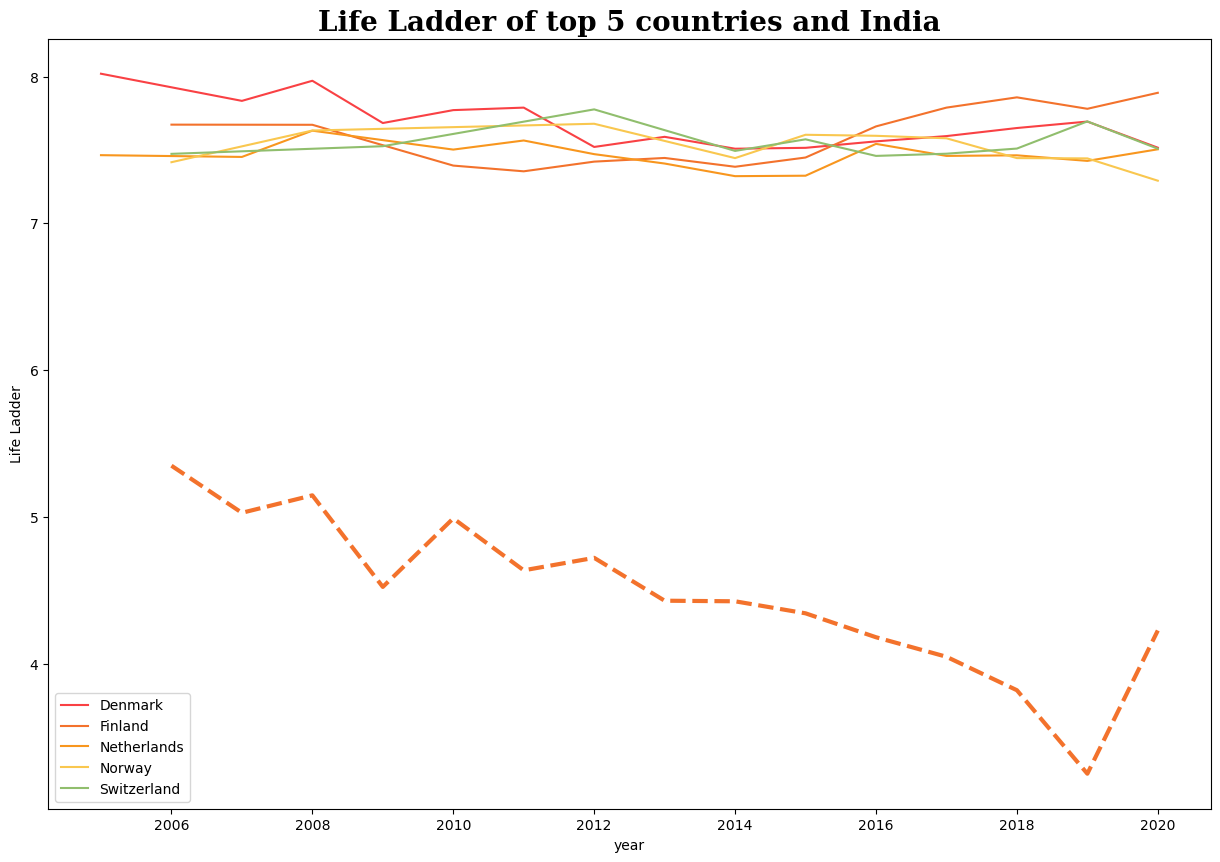

In [14]:
top_5 = df1.groupby('Country name')['Life Ladder'].mean().nlargest(5)
#bot_5 = df1.groupby('Country name')['Life Ladder'].mean().nsmallest(5)
fig=plt.figure(figsize=(15,10))
plt.title("Life Ladder of top 5 countries and India",family='Serif', weight='bold', size=20)
sns.lineplot(data=df1[df1['Country name'].isin(top_5.index)], x='year',y='Life Ladder',hue='Country name', palette=color[0:5])
sns.lineplot(data=df1[df1['Country name']=='India'], x='year',y='Life Ladder', color=color[1], linewidth=3, ls='--')


Let us check what are the field contribute to happiness index

In [15]:
df2=df[['Country name', 'Regional indicator', 'Ladder score',
        'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [16]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical columns
label_encoders = {}
for col in df2.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le

# Ab correlation calculate karein
cols = df2.corr()['Ladder score'].sort_values(ascending=False)


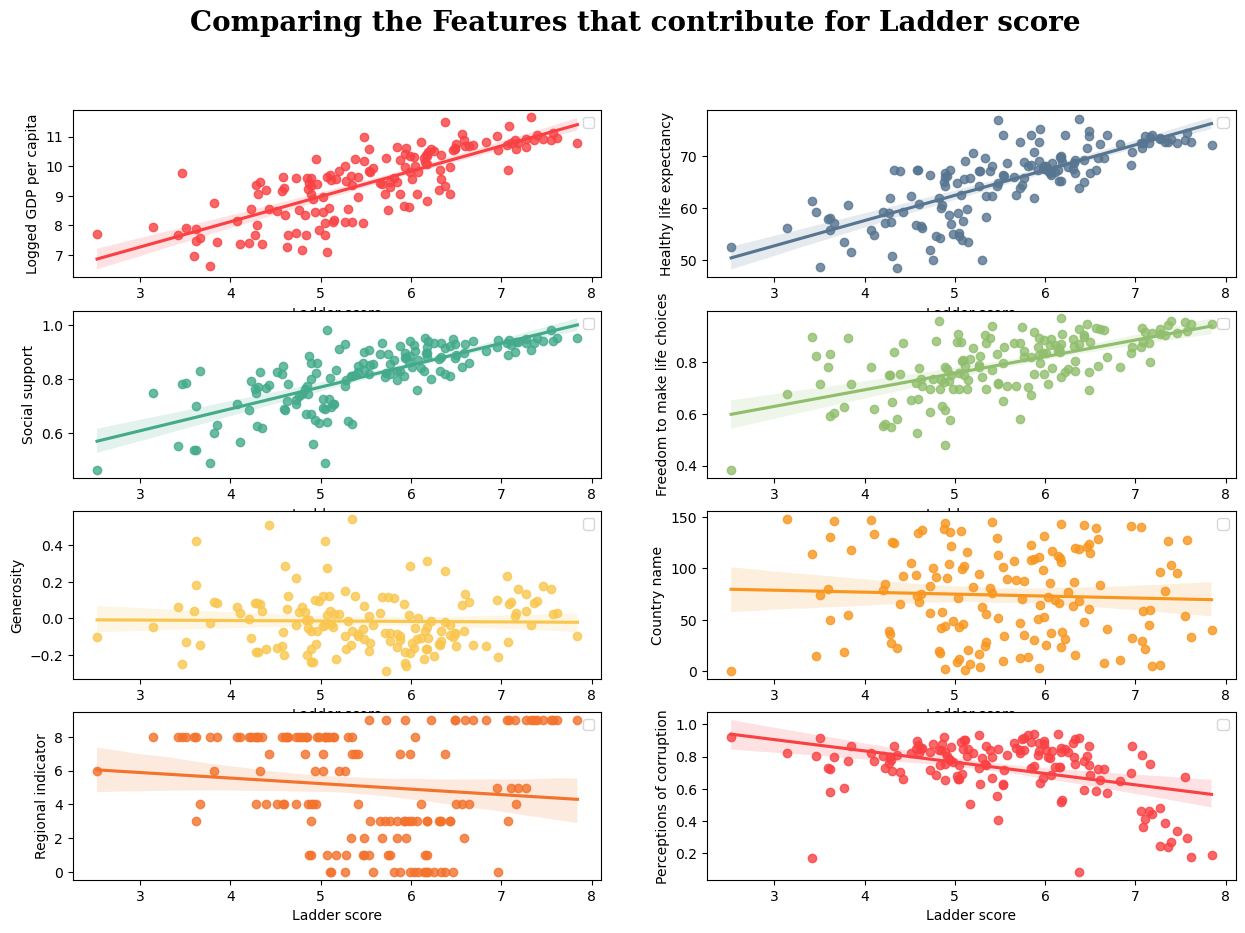

In [17]:
fig=plt.figure(figsize=(15,10))
plt.suptitle("Comparing the Features that contribute for Ladder score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=df2, x='Ladder score',y=i, color=color[-j])
    ax.legend('')
    j=j+1
    
plt.legend('')


# Observation
Above plot clearly shows that the columns 
1. Logged GDP per capita
2. Social support
3. Healthy life expectancy
4. Freedom to make life choices
5. Generosity - less likely
6. Perceptions of corruption

have clear contribution to Happiness index

In [18]:
def comp_country(country1, country2):
    df3=df1[df1['Country name'].isin([country1,country2])]
    df3.rename(columns={'Healthy life expectancy at birth':'Healthy life expectancy','Log GDP per capita':'Logged GDP per capita','Life Ladder':'Ladder score'}, inplace=True)
    fig=plt.figure(figsize=(15,10))
    plt.suptitle("Comparing the Features that contribute for Happiness index for {} vs {}".format(country1, country2),family='Serif', weight='bold', size=20)
    j=0 
    for i in cols.index:    
        ax=plt.subplot(421+j)
        sns.lineplot(data=df3,x='year',y=i, hue='Country name', color=color[-2])
        j=j+1
    return

In [25]:
print(df.columns)

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


In [26]:
print(df['Regional indicator'].isnull().sum())

0


In [27]:
print(df['Regional indicator'].dtype)

object


In [29]:
df['Regional indicator'] = pd.to_numeric(df['Regional indicator'], errors='coerce')

ValueError: Could not interpret value `Regional indicator` for parameter `y`

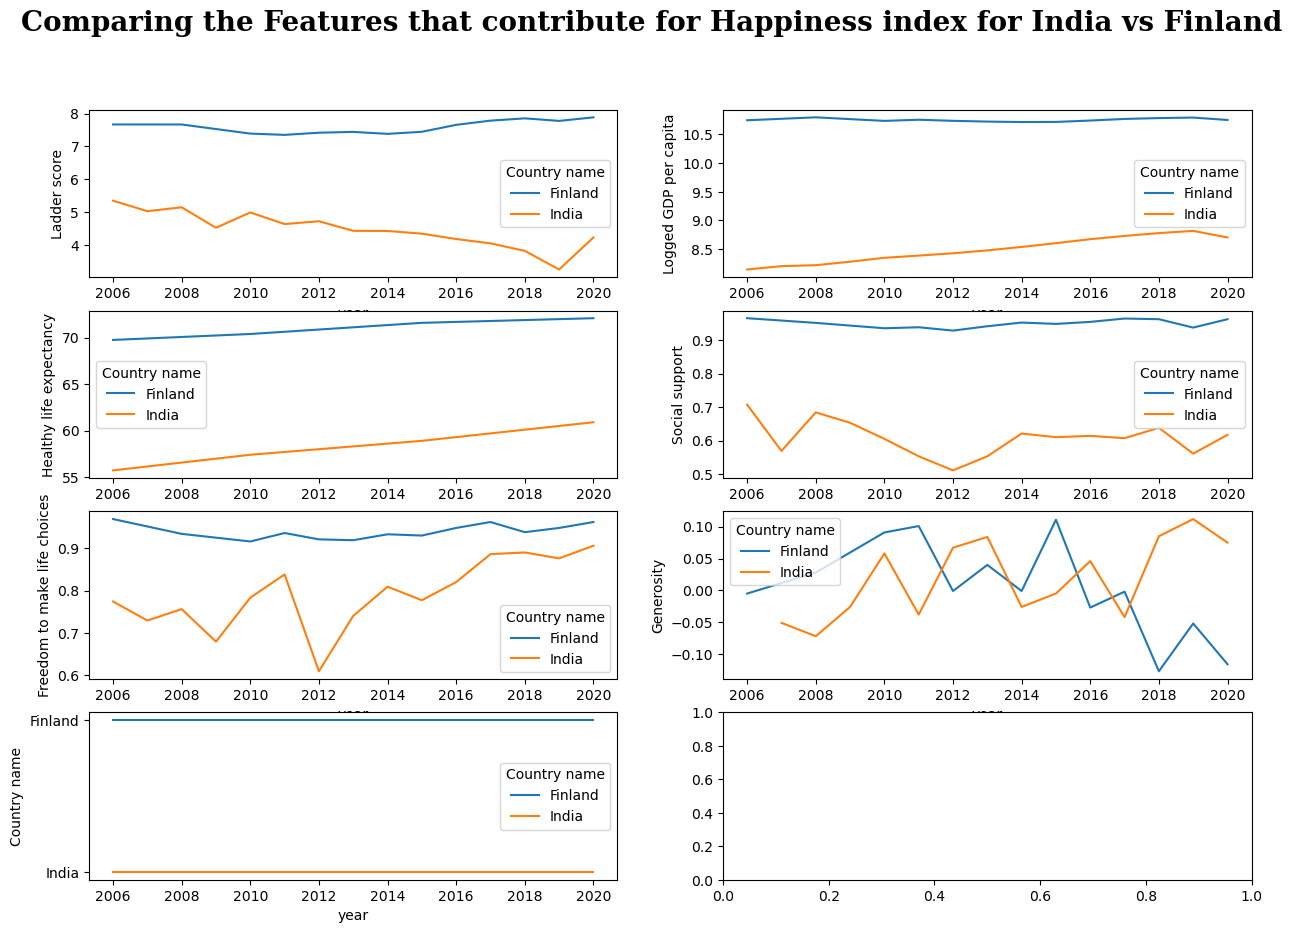

In [32]:
comp_country('India','Finland')

ValueError: Could not interpret value `Regional indicator` for parameter `y`

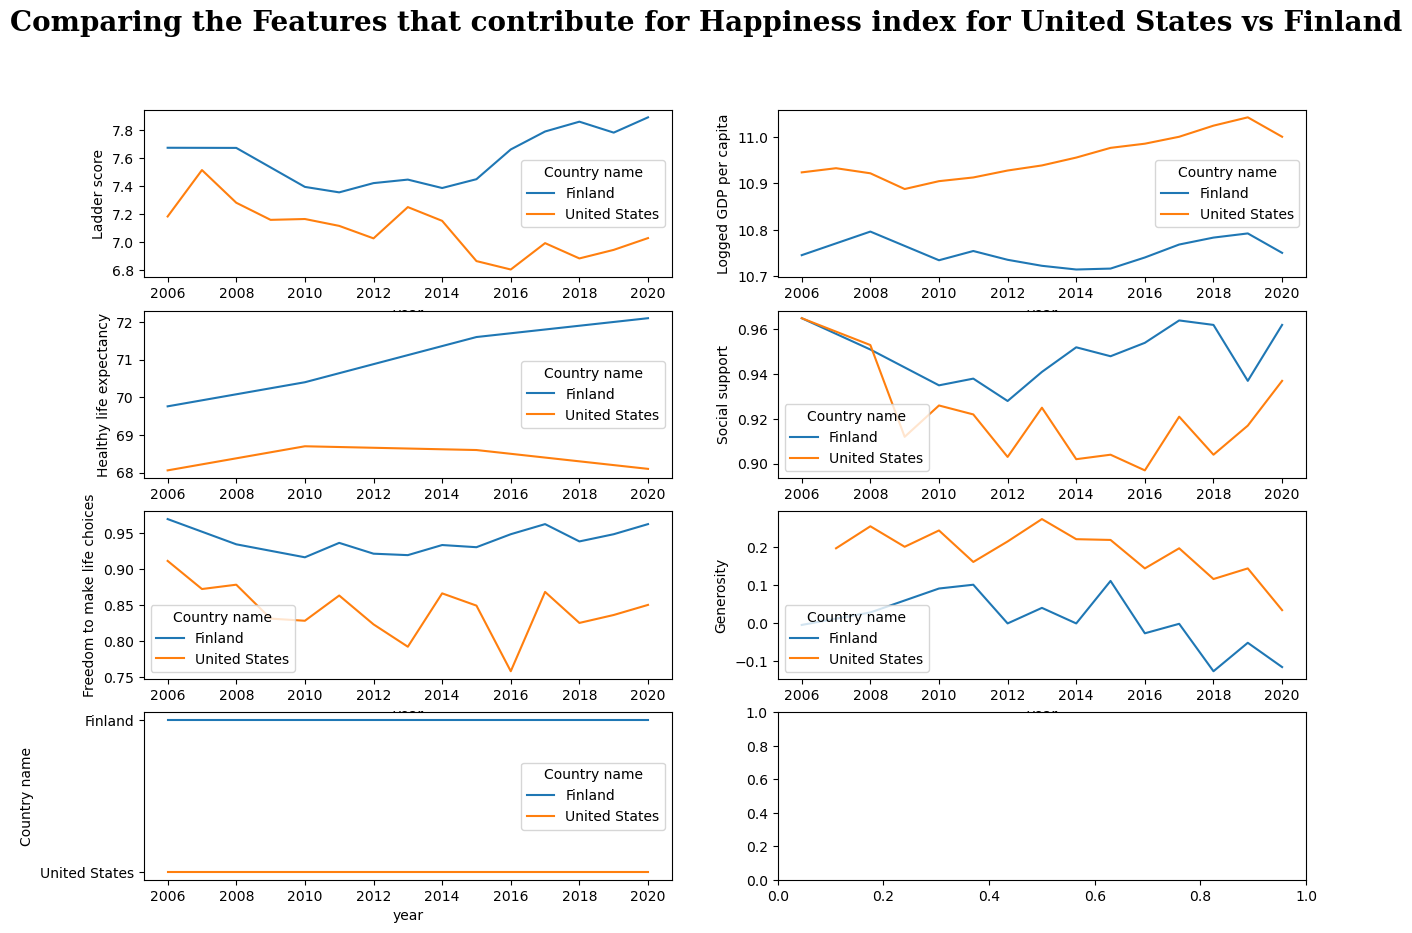

In [31]:
comp_country('United States','Finland')

In [21]:
df.mean()

TypeError: Could not convert ['FinlandDenmarkSwitzerlandIcelandNetherlandsNorwaySwedenLuxembourgNew ZealandAustriaAustraliaIsraelGermanyCanadaIrelandCosta RicaUnited KingdomCzech RepublicUnited StatesBelgiumFranceBahrainMaltaTaiwan Province of ChinaUnited Arab EmiratesSaudi ArabiaSpainItalySloveniaGuatemalaUruguaySingaporeKosovoSlovakiaBrazilMexicoJamaicaLithuaniaCyprusEstoniaPanamaUzbekistanChilePolandKazakhstanRomaniaKuwaitSerbiaEl SalvadorMauritiusLatviaColombiaHungaryThailandNicaraguaJapanArgentinaPortugalHondurasCroatiaPhilippinesSouth KoreaPeruBosnia and HerzegovinaMoldovaEcuadorKyrgyzstanGreeceBoliviaMongoliaParaguayMontenegroDominican RepublicNorth CyprusBelarusRussiaHong Kong S.A.R. of ChinaTajikistanVietnamLibyaMalaysiaIndonesiaCongo (Brazzaville)ChinaIvory CoastArmeniaNepalBulgariaMaldivesAzerbaijanCameroonSenegalAlbaniaNorth MacedoniaGhanaNigerTurkmenistanGambiaBeninLaosBangladeshGuineaSouth AfricaTurkeyPakistanMoroccoVenezuelaGeorgiaAlgeriaUkraineIraqGabonBurkina FasoCambodiaMozambiqueNigeriaMaliIranUgandaLiberiaKenyaTunisiaLebanonNamibiaPalestinian TerritoriesMyanmarJordanChadSri LankaSwazilandComorosEgyptEthiopiaMauritaniaMadagascarTogoZambiaSierra LeoneIndiaBurundiYemenTanzaniaHaitiMalawiLesothoBotswanaRwandaZimbabweAfghanistan'
 'Western EuropeWestern EuropeWestern EuropeWestern EuropeWestern EuropeWestern EuropeWestern EuropeWestern EuropeNorth America and ANZWestern EuropeNorth America and ANZMiddle East and North AfricaWestern EuropeNorth America and ANZWestern EuropeLatin America and CaribbeanWestern EuropeCentral and Eastern EuropeNorth America and ANZWestern EuropeWestern EuropeMiddle East and North AfricaWestern EuropeEast AsiaMiddle East and North AfricaMiddle East and North AfricaWestern EuropeWestern EuropeCentral and Eastern EuropeLatin America and CaribbeanLatin America and CaribbeanSoutheast AsiaCentral and Eastern EuropeCentral and Eastern EuropeLatin America and CaribbeanLatin America and CaribbeanLatin America and CaribbeanCentral and Eastern EuropeWestern EuropeCentral and Eastern EuropeLatin America and CaribbeanCommonwealth of Independent StatesLatin America and CaribbeanCentral and Eastern EuropeCommonwealth of Independent StatesCentral and Eastern EuropeMiddle East and North AfricaCentral and Eastern EuropeLatin America and CaribbeanSub-Saharan AfricaCentral and Eastern EuropeLatin America and CaribbeanCentral and Eastern EuropeSoutheast AsiaLatin America and CaribbeanEast AsiaLatin America and CaribbeanWestern EuropeLatin America and CaribbeanCentral and Eastern EuropeSoutheast AsiaEast AsiaLatin America and CaribbeanCentral and Eastern EuropeCommonwealth of Independent StatesLatin America and CaribbeanCommonwealth of Independent StatesWestern EuropeLatin America and CaribbeanEast AsiaLatin America and CaribbeanCentral and Eastern EuropeLatin America and CaribbeanWestern EuropeCommonwealth of Independent StatesCommonwealth of Independent StatesEast AsiaCommonwealth of Independent StatesSoutheast AsiaMiddle East and North AfricaSoutheast AsiaSoutheast AsiaSub-Saharan AfricaEast AsiaSub-Saharan AfricaCommonwealth of Independent StatesSouth AsiaCentral and Eastern EuropeSouth AsiaCommonwealth of Independent StatesSub-Saharan AfricaSub-Saharan AfricaCentral and Eastern EuropeCentral and Eastern EuropeSub-Saharan AfricaSub-Saharan AfricaCommonwealth of Independent StatesSub-Saharan AfricaSub-Saharan AfricaSoutheast AsiaSouth AsiaSub-Saharan AfricaSub-Saharan AfricaMiddle East and North AfricaSouth AsiaMiddle East and North AfricaLatin America and CaribbeanCommonwealth of Independent StatesMiddle East and North AfricaCommonwealth of Independent StatesMiddle East and North AfricaSub-Saharan AfricaSub-Saharan AfricaSoutheast AsiaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaMiddle East and North AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaMiddle East and North AfricaMiddle East and North AfricaSub-Saharan AfricaMiddle East and North AfricaSoutheast AsiaMiddle East and North AfricaSub-Saharan AfricaSouth AsiaSub-Saharan AfricaSub-Saharan AfricaMiddle East and North AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaSouth AsiaSub-Saharan AfricaMiddle East and North AfricaSub-Saharan AfricaLatin America and CaribbeanSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaSouth Asia'] to numeric

In [ ]:
def country_comp1(country1, country2):
    df4=df[df['Country name'].isin([country1, country2])]
    df4=df4[cols.index].T
    df4.columns=[country1,country2]
    print(df4)
    fig = plt.figure(figsize=(15,10))
    plt.suptitle("Comparison {} and {}".format(country1, country2),family='Serif', weight='bold', size=20)
    g=gs.GridSpec(nrows=1, ncols=2, wspace=0)
    ax1=plt.subplot(g[0,0])
    for s in ['left','right','top','bottom']:
        ax1.spines[s].set_visible(False)
   
    #ax1.set_xlim(xmin=0)
    ax1=sns.barplot(data=df4,y=df4.index,x=country1, color=color[-1]).invert_xaxis()
    
    ax2=plt.subplot(g[0,1], sharey=ax1)
    ax2=sns.barplot(data=df4,y=df4.index,x=country2, color=color[-2])
    #ax2.set_xlim(xmin=0)
    ax2.yaxis.tick_right()
    for s in ['left','right','top','bottom']:
        ax2.spines[s].set_visible(False)
    return

In [ ]:
ax1.get_xlim()

In [22]:
country_comp1('Finland','India')

NameError: name 'country_comp1' is not defined

In [23]:
country_comp1('United States','Russia')

NameError: name 'country_comp1' is not defined

In [44]:
country_comp1('United States','India')

NameError: name 'cols' is not defined

In [45]:
df6=df1.merge(df['Regional indicator'],left_on=df1['Country name'], right_on=df['Country name']).drop('key_0', axis=1)

In [46]:
df6['Regional indicator'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [47]:
df6[df6['Regional indicator']=='South Asia'].pivot_table(index='Country name', columns='year')['Life Ladder']

TypeError: agg function failed [how->mean,dtype->object]

TypeError: agg function failed [how->mean,dtype->object]

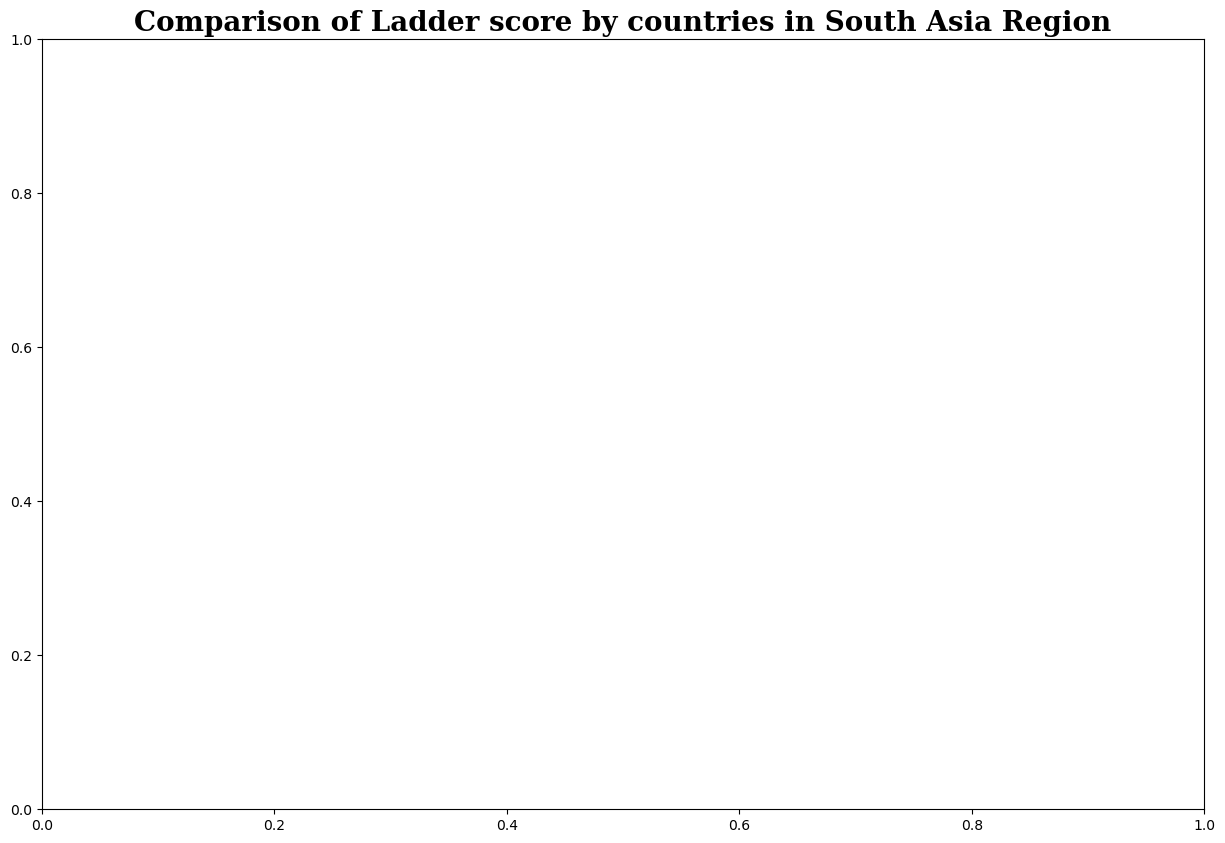

In [48]:
#fig=plt.figure(figsize=(15,10))
for i in df6['Regional indicator'].unique():
    _,ax=plt.subplots(figsize=(15,10))
    ax.set_title("Comparison of Ladder score by countries in {} Region".format(i),family='Serif', weight='bold', size=20)
    ax=sns.heatmap(df6[df6['Regional indicator']==i].pivot_table(index='Country name', columns='year')['Life Ladder'], square=True, linewidths=1, cmap='GnBu_r', annot=True, cbar=False)
   # plt.show()

In [ ]:
# Ladder score changes - Inida
df7=df1[df1['Country name'].isin(['India','Finland'])].loc[:,'Country name':'Life Ladder']


NameError: name 'df7' is not defined

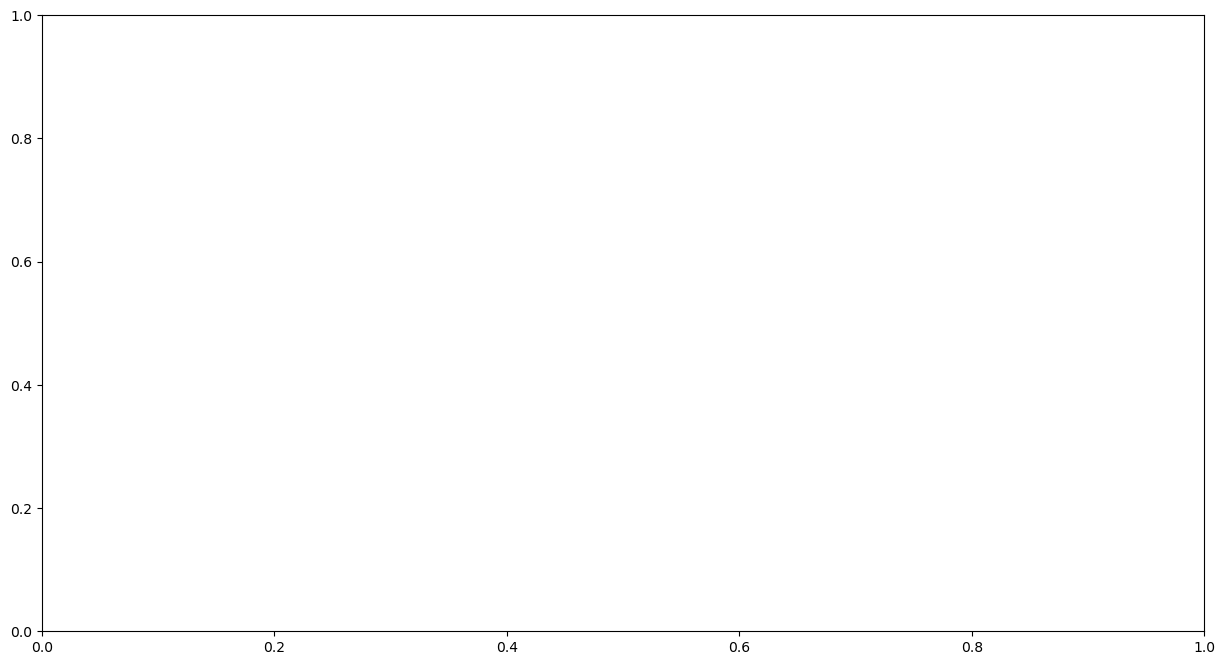

In [49]:
fig=plt.figure(figsize=(15,8))
ax=plt.subplot()
ax=sns.lineplot(data=df7,x='year',y='Life Ladder', alpha=0.5, hue='Country name')
ax=sns.scatterplot(data=df7,x='year',y='Life Ladder',hue='Country name', size='Life Ladder', sizes=(100,700))
for i in range(len(df7)):
    ax.text(x=df7['year'].iloc[i],y=df7['Life Ladder'].iloc[i], s=df7['Life Ladder'].iloc[i])

# Conclusion
Countries having good Healthly life, Social support, Freedom to make life choised, less corruptions, good per capita income have high happiness index